# Day 3: Training a model with PyTorch - Handwriting Detection

Welcome to day 3 of IOAI Canada training!

Today, we will be training our first neural network model using PyTorch. Using the MNIST database, we will create and train a model that will detect handwritten digits from 0-9.

The parts of the code you will write will be marked with "TO-DO". Ensure you pay attention to the lecture on how to write the code.

**Please make a copy of this notebook so your changes are saved.**

If you have any questions, do not hesitate to ask questions in the zoom call.

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch import nn, optim

## Step 1: Downloading and preparing the data

Objectives:
- Setup two datasets - one for training and one for validation
- Creating dataloaders for both datasets to streamline training and validation

In [6]:
# TO-DO: Download the MNIST dataset and create dataloaders for training and testing.

batch_size = 100

train_dataset = datasets.MNIST(
    root='train',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = datasets.MNIST(
    root='test',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=True
)

## Step 2: Display an image

To ensure that our dataset works, we will use the matplotlib library to display one of the images in the dataset.

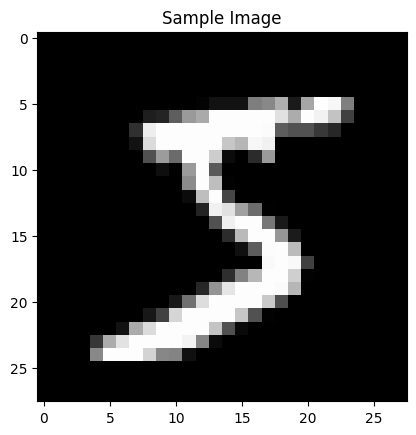

In [13]:
# TO-DO: Display one image from the training dataset using matplotlib.

plt.imshow(train_dataset.data[0], cmap='gray') # cmap = color map
plt.title("Sample Image")
plt.show()

## Step 3: Defining the model, loss function, and optimizer

Here, we need to specify the device that will be used (GPU or CPU)

We will create a very simple neural network, passing each pixel in the image (28x28) as an input. The network has an output of 10, correspoinding to the 10 digits.

The loss function dictates how the loss, or how correct/incorrect the model is, is calculated.

The optmizer uses the calculated loss, and modifies the weights of the neural network to reduce this loss.

In [20]:
# TO-DO: Initialize the architecture of the device, model, loss function and optimizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = nn.Sequential(nn.Linear(28*28, 28), nn.ReLU(), nn.Linear(28, 10)).to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.005)

## Step 4: Training the model

For each batch of images:
- Flatten each image, so that it becomes an array of pixels that can be fed into the network
- Get the current model's predictions for each image
- Determine how well the model did by calculating its loss. The smaller the loss, the better the model.
- Backpropagate the loss and modify the weights of the network.

These steps are repeated for every batch of images (in our case, every 100 images, the loss is calculated and weights are changed).

Every time the program iterates through the entire dataset, it goes through *one* epoch. Here, we will iterate through the dataset 10 times.

In [21]:
# TO-DO: Train the model.

num_epochs = 10

batch_print_interval = 100
running_loss = 0

for epoch in range(num_epochs):

  model.train()

  for i, data in enumerate(train_loader): # Loop through for every batch in _______

    images, labels = data

    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    images = images.view(images.size(0), -1)
    pred = model(images)

    loss = loss_fn(pred, labels)
    running_loss += loss.item()
    loss.backward()
    optimizer.step()

    if (i % batch_print_interval == batch_print_interval - 1):
        print(f"Epoch: {epoch + 1} Batch: {i + 1} Loss: {running_loss / batch_print_interval:.3f}")
        running_loss = 0

Epoch: 1 Batch: 100 Loss: 2.251
Epoch: 1 Batch: 200 Loss: 2.141
Epoch: 1 Batch: 300 Loss: 2.011
Epoch: 1 Batch: 400 Loss: 1.878
Epoch: 1 Batch: 500 Loss: 1.728
Epoch: 1 Batch: 600 Loss: 1.576
Epoch: 2 Batch: 100 Loss: 1.431
Epoch: 2 Batch: 200 Loss: 1.310
Epoch: 2 Batch: 300 Loss: 1.191
Epoch: 2 Batch: 400 Loss: 1.089
Epoch: 2 Batch: 500 Loss: 1.015
Epoch: 2 Batch: 600 Loss: 0.945
Epoch: 3 Batch: 100 Loss: 0.887
Epoch: 3 Batch: 200 Loss: 0.829
Epoch: 3 Batch: 300 Loss: 0.780
Epoch: 3 Batch: 400 Loss: 0.750
Epoch: 3 Batch: 500 Loss: 0.708
Epoch: 3 Batch: 600 Loss: 0.672
Epoch: 4 Batch: 100 Loss: 0.662
Epoch: 4 Batch: 200 Loss: 0.622
Epoch: 4 Batch: 300 Loss: 0.610
Epoch: 4 Batch: 400 Loss: 0.590
Epoch: 4 Batch: 500 Loss: 0.563
Epoch: 4 Batch: 600 Loss: 0.556
Epoch: 5 Batch: 100 Loss: 0.550
Epoch: 5 Batch: 200 Loss: 0.519
Epoch: 5 Batch: 300 Loss: 0.504
Epoch: 5 Batch: 400 Loss: 0.518
Epoch: 5 Batch: 500 Loss: 0.496
Epoch: 5 Batch: 600 Loss: 0.489
Epoch: 6 Batch: 100 Loss: 0.476
Epoch: 6

## Step 5: Evaluate the model

Now that our model is trained, let's see how well our model performs against a dataset it hasn't seen before - the testing dataset.

Here, we want to compare the model's prediction for the image with the actual image label (so if an image contains the number 9, we want the model to predict a 9)

We calculate the accuracy of each batch using the test_loader, and then evaluate the total accuracy by calculating the average accuracy across all batches.

In [23]:
# TO-DO: Evaluate the model, and print its accuracy on the testing dataset.
model.eval()

with torch.no_grad():

    total_accuracy = 0
    for i, data in enumerate(test_loader):

        images, labels = data

        images = images.to(device)
        labels = labels.to(device)

        images = images.view(images.size(0), -1)
        test_output = model(images)

        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        batch_accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        total_accuracy += batch_accuracy

    accuracy = total_accuracy/len(test_loader)

print(f"Test Accuracy of the model on the 10000 test images: {accuracy:.3f}")

Test Accuracy of the model on the 10000 test images: 0.902


## Step 6: Our own handwriting data

Now, we will import our own handwriting, and see if the model can recognize it.

To do this, you need to create a 28x28 image with a black background using Microsoft Paint, or any other software.

Then, you will need to mount your Google Drive so that Google Colab can access files on your drive. Pay attention to the lecture on how to do this.

Afterwards, open the image, preprocess it (convert to grayscale and make it to a tensor) so it can be read by our model, and output its prediction.

In [71]:
from google.colab import files
uploaded = files.upload()

Saving Aaa.bmp to Aaa (1).bmp


In [72]:
in_file_name = [x for x in uploaded.keys()][0]

In [73]:
# TO-DO: Read an image file from Google Drive, and have the model predict the corresponding digit.
import cv2
image = cv2.imread(in_file_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = transforms.Compose([
    transforms.ToTensor()
])

image = transform(image)

print(image.size())

torch.Size([3, 28, 28])


In [74]:
image = image[0]
print(image.size())

torch.Size([28, 28])


In [75]:
image = image.to(device)
image = image.flatten()
test_output = model(image)
pred_y = torch.argmax(test_output).item()
print(f"Predicted: {pred_y}")

Predicted: 4


## Step 7: Save & Load our model

We don't want to train our model every time we open up our program. Saving our model allows us to retrieve this model at a later time and use it.

IMPORTANT: When loading the model, the architecture of the model must be defined first before loading.

In [ ]:
# TO-DO: Save the model to Google Drive
torch

In [ ]:
# TO-DO: Load the model from Google Drive
